# Preparing Image Data

- In reality, images are not loaded through built-in libraries like the MNIST images. 
- Realistic contents:
    - Larger color images
    - Subjects are not centered. 

## Horses or Human

- [Horses or Humans](https://laurencemoroney.com/datasets.html#horses-or-humans-dataset)
    - 1,000 images that are 300 by 300 in full color of horses and humans in various poses.
    - Possible additional background content
- Data organization methodology in Tensorflow
    - Create directories containing the images.
    - Images' labels are based on their parent directory. 
        - Training images for humans in a Humans folder.
        - Training images for horses in Horses folder.
        - Similarly for validation, we can have folders for Horses and Humans.
- TensorFlow can use the Image Data Generator to turn directories like this into a trainable pipeline.
    - `tensorflow.keras.preprocessing`
- The Image Data Generator can perform processing on the images.
    - E.g., normalization of images (dividing by 255) can be done as an initialization on 
    the Image Data Generator.
- Common target size of the images can also be specified. 
    - If images of different sizes, the generator will resize them to this.

## Data acquisition

- Create a directory called `data` in the same directory as your notebook. 
- Download the [training data](https://storage.googleapis.com/learning-datasets/horse-or-human.zip) into `data` and unzip. 
- Download the [validation data](https://storage.googleapis.com/learning-datasets/validation-horse-or-human.zip) into `data` and unzip. 

In [16]:
import os
import zipfile

local_zip = './data/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./data/horse-or-human')
local_zip = './data/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./data/validation-horse-or-human')
zip_ref.close()

In [17]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('./data/horse-or-human/horses')
# Directory with our training human pictures
train_human_dir = os.path.join('./data/horse-or-human/humans')
# Directory with our training horse pictures
validation_horse_dir = os.path.join('./data/validation-horse-or-human/horses')
# Directory with our training human pictures
validation_human_dir = os.path.join('./data/validation-horse-or-human/humans')
train_horse_names = os.listdir('./data/horse-or-human/horses')
print(train_horse_names[:10])
train_human_names = os.listdir('./data/horse-or-human/humans')
print(train_human_names[:10])
validation_horse_hames = os.listdir('./data/validation-horse-or-human/horses')
print(validation_horse_hames[:10])
validation_human_names = os.listdir('./data/validation-horse-or-human/humans')
print(validation_human_names[:10])

['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']
['horse1-000.png', 'horse1-105.png', 'horse1-122.png', 'horse1-127.png', 'horse1-170.png', 'horse1-204.png', 'horse1-224.png', 'horse1-241.png', 'horse1-264.png', 'horse1-276.png']
['valhuman01-00.png', 'valhuman01-01.png', 'valhuman01-02.png', 'valhuman01-03.png', 'valhuman01-04.png', 'valhuman01-05.png', 'valhuman01-06.png', 'valhuman01-07.png', 'valhuman01-08.png', 'valhuman01-09.png']


In [19]:
import tensorflow as tf

## Define your model and optimizer

In [20]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image with 3 bytes color
    # This is the first convolution
    tf.keras.Input(shape=(100,100,3)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class
    # ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [21]:
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,617,665 (9.99 MB)

 Trainable params: 2,617,665 (9.99 MB)

 Non-trainable params: 0 (0.00 B)

None


In [22]:
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(learning_rate=0.0001)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['acc'])

## Organize your data into Generators

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be augmented according to whichever lines are uncommented
# below. We can first try without any of the augmentation beyond the rescaling
train_datagen = ImageDataGenerator(
      rescale=1./255,
      #rotation_range=40,
      #width_shift_range=0.2,
      #height_shift_range=0.2,
      #shear_range=0.2,
      #zoom_range=0.2,
      #horizontal_flip=True,
      #fill_mode='nearest'
      )

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './data/horse-or-human/',  # This is the source directory for training images
        target_size=(100, 100),  # All images will be resized to 100x100
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
        './data/validation-horse-or-human',
        target_size=(100, 100),
        class_mode='binary')


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


## Train your model
This may take a little while. Remember we are now building and training relatively complex computer vision models!

In [24]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,
      epochs=100,
      verbose=1,
      validation_data=validation_generator)

f:\Anaconda3\envs\tf\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 703ms/step - acc: 0.4954 - loss: 0.6905 - val_acc: 0.5664 - val_loss: 0.6801
Epoch 2/100
1/8 ━━━━━━━━━━━━━━━━━━━━ 3s 436ms/step - acc: 0.7109 - loss: 0.6770

f:\Anaconda3\envs\tf\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - acc: 0.7109 - loss: 0.6770 - val_acc: 0.5000 - val_loss: 0.6841
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 800ms/step - acc: 0.5637 - loss: 0.6799 - val_acc: 0.5000 - val_loss: 0.6800
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - acc: 0.5938 - loss: 0.6493 - val_acc: 0.5508 - val_loss: 0.6620
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 727ms/step - acc: 0.6421 - loss: 0.6513 - val_acc: 0.5156 - val_loss: 0.6559
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - acc: 0.5781 - loss: 0.6310 - val_acc: 0.8398 - val_loss: 0.6213
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 710ms/step - acc: 0.6970 - loss: 0.6157 - val_acc: 0.5000 - val_loss: 0.9675
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - acc: 0.4297 - loss: 0.8817 - val_acc: 0.5000 - val_loss: 0.6163
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 778ms/step - acc: 0.7250 - loss: 0.6001 - val_acc: 0.8828 - val_loss: 0.5211
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - acc: 0.8516 - loss: 0.5653 

## Run your Model

Let's now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, it will then upload them, and run them through the model, giving an indication of whether the object is a horse or a human. **Was the model correct? Try a couple more images and see if you can confuse it!**

In [ ]:
import numpy as np
from io import BytesIO
import urllib
from tensorflow.keras import utils
from IPython.display import Image, display

baseURL = 'https://www.cs.wcupa.edu/LNGO/data/horse-human-confuse/'
fileList = ['a-horse.jpg','horse-jockey.jpg','horse-hindleg.jpg','two-man.jpg']

for anImage in fileList:
  pathURL = baseURL + anImage
  print(pathURL)
  with urllib.request.urlopen(pathURL) as url:
    print(url)
    img = utils.load_img(BytesIO(url.read()), target_size=(100, 100))
    display(Image(url=pathURL))
    x = utils.img_to_array(img)
    x = x / 255.0
    x = np.expand_dims(x, axis=0)
    image_tensor = np.vstack([x])
    classes = model.predict(image_tensor)
    print(classes)
    print(classes[0])
    if classes[0]>0.5:
      print("Is a human")
    else:
      print("Is a horse")


https://www.cs.wcupa.edu/LNGO/data/horse-human-confuse/a-horse.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[[2.920234e-06]]
[2.920234e-06]
Is a horse
https://www.cs.wcupa.edu/LNGO/data/horse-human-confuse/horse-jockey.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[2.1566418e-06]]
[2.1566418e-06]
Is a horse
https://www.cs.wcupa.edu/LNGO/data/horse-human-confuse/horse-hindleg.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[0.9390406]]
[0.9390406]
Is a human
https://www.cs.wcupa.edu/LNGO/data/horse-human-confuse/two-man.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[[3.7680047e-07]]
[3.7680047e-07]
Is a horse


## Finally lets visualize all of the model layers!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


f:\Anaconda3\envs\tf\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_13']
Received: inputs=Tensor(shape=(1, 100, 100, 3))
  warnings.warn(msg)
C:\Users\Linh B Ngo\AppData\Local\Temp\ipykernel_76064\571501982.py:50: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
C:\Users\Linh B Ngo\AppData\Local\Temp\ipykernel_76064\571501982.py:53: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


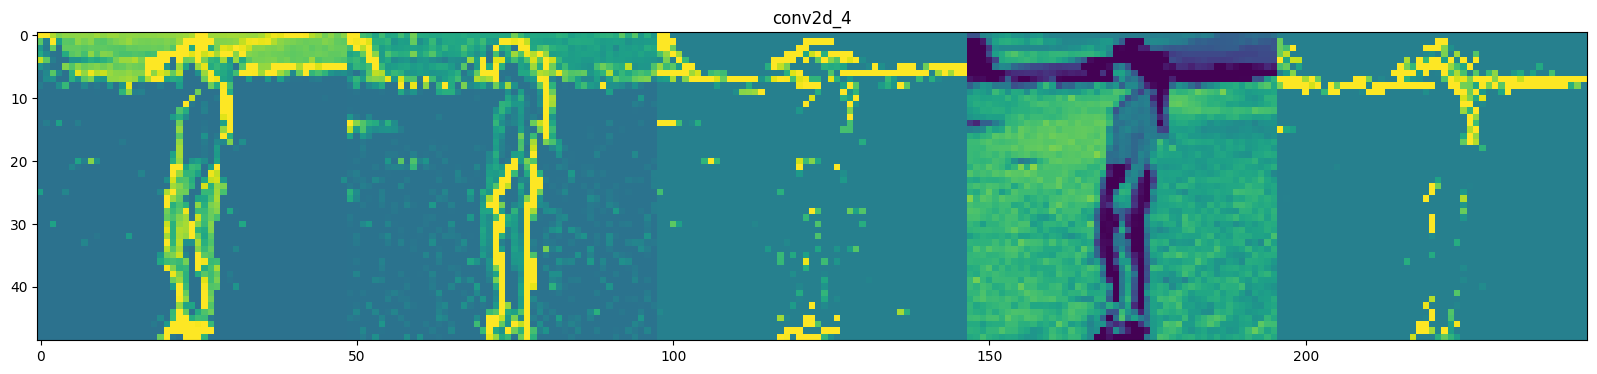

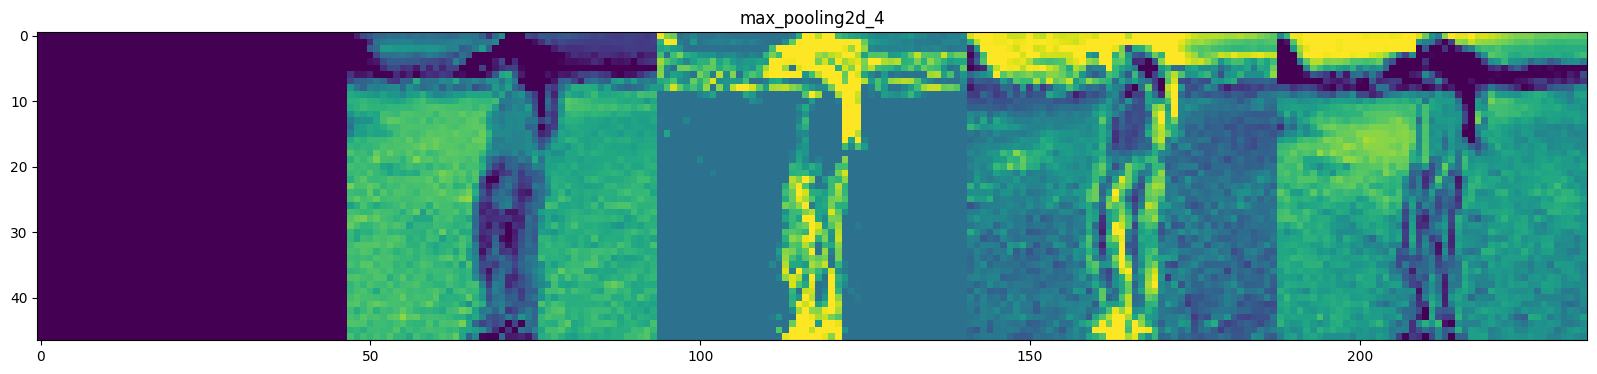

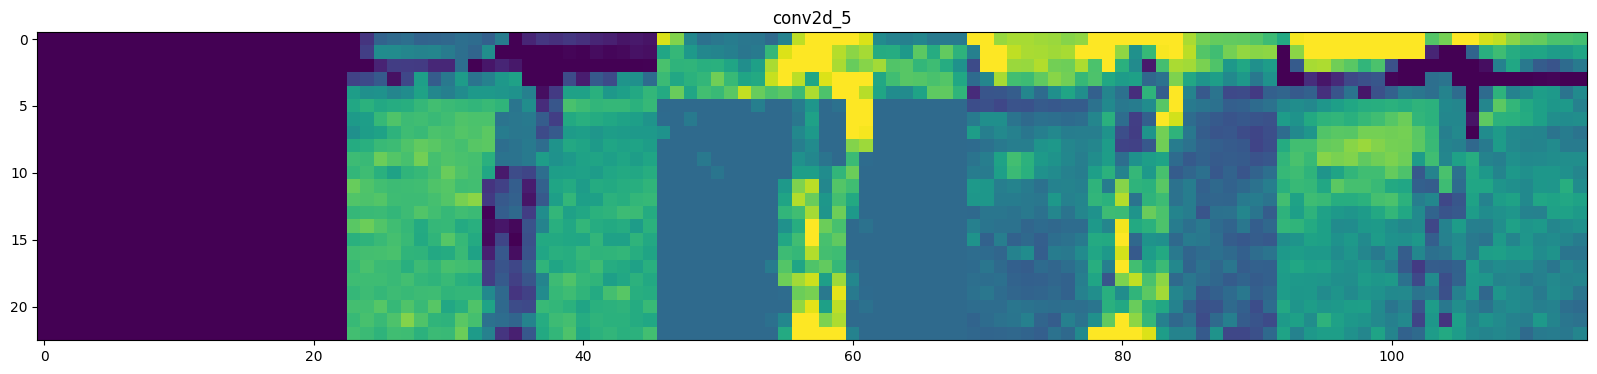

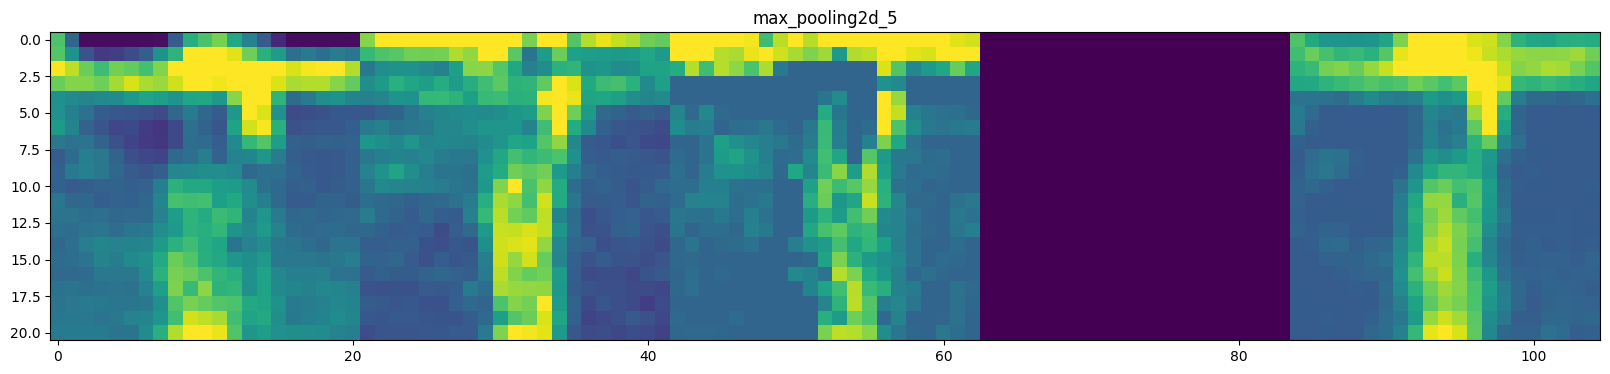

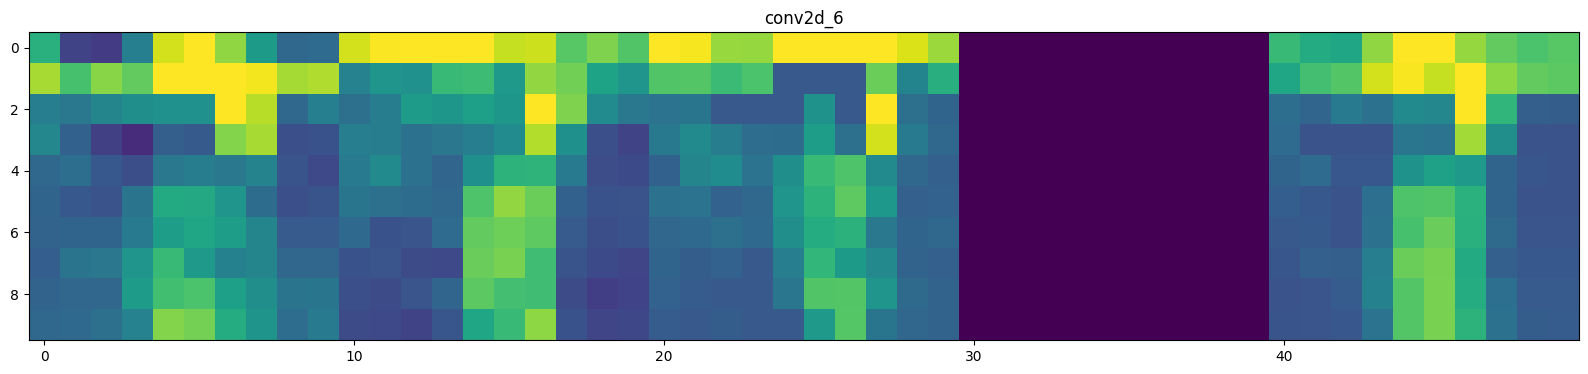

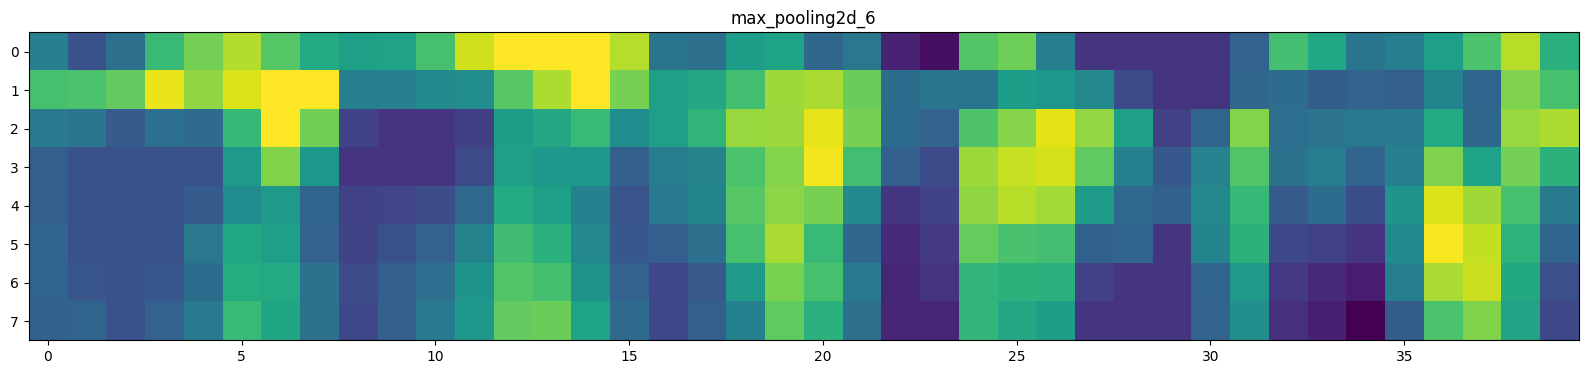

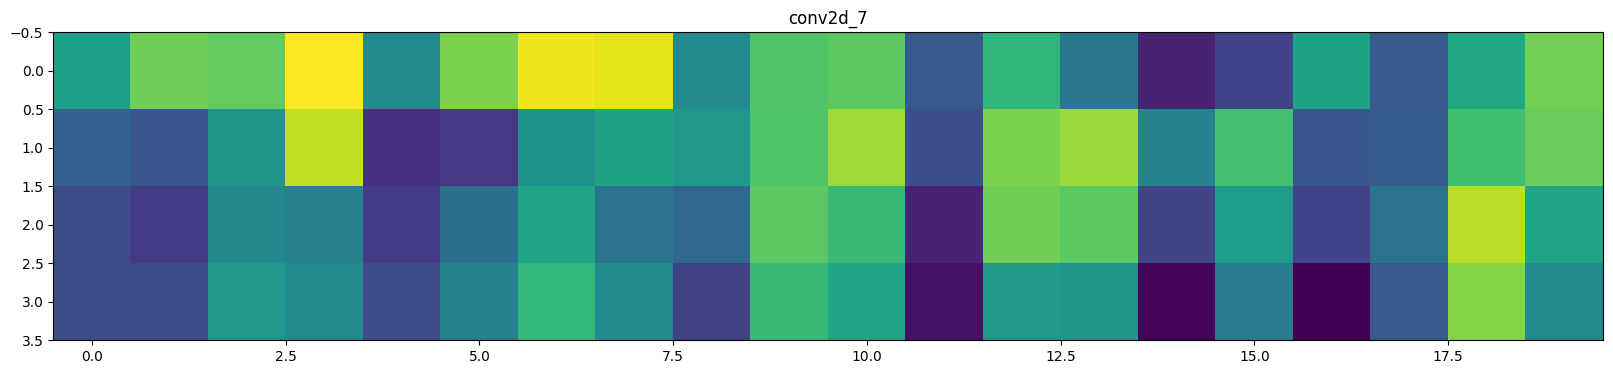

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.inputs, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)
# uncomment the following line if you want to pick the Xth human file manually
img_path = human_img_files[0]

img = load_img(img_path, target_size=(100, 100))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (100, 100, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 100, 100, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    n_features = min(n_features,5) # limit to 5 features for easier viewing
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

## Exercise 1

- Rework the above cell so that it visualizes the layers of the two *confusing* images. What causes the confusion?


## Overfitting 

The above issue is caused by overfitting.

### How convolutional neural networks work?

- If a conv network is trained only on cat images that are upright, then the computer might only recognize ears
that are oriented in that way as `ears`.
    - It may not recognize the image on the side as having the ears of a cat.
    - Solution: Rotate the image a little before training, creating an `artificial image` of a cat with the ears turning sideway. 
- Image data generator has other similar parameters to tune. 
    - Rotation range, which randomly rotate every image up to 40 degrees left or right
    - Width shift and height shift range as a percentage to help moving the core images around within the frames. 
    - Skewing images.
    - Zoom into images to create labeled sections. 
    - Flip images to left and right size. 
    - Shearing to cut and fill in pixels. 
- Use in moderation as they will impact training speed. 

## Exercise 2

- Uncomment the augmentations of the ImageDataGenerator.
  - Does it help with the prediction results, especially for the *confusing* images?
  - What does the visualization look like now?


## Dropout Regularization

- Overfitting is where a network may become too specialized in a particular type of input data and fare poorly on others. 
    - One technique to help overcome this is use of dropout regularization

- When a neural network is being trained, each individual neuron will have an effect on neurons in subsequent layers. 
    - In larger networks, some neurons can become overspecialized—and that feeds downstream, potentially causing the network as a whole to become overspecialized and leading to overfitting. 
    - Additionally, neighboring neurons can end up with similar weights and biases.

- While training, if you remove a random number of neurons and connections, and ignore them, their contribution to the neurons in the next layer are temporarily blocked
    - This reduces the chances of the neurons becoming overspecialized. The network will still learn the same 
    number of parameters, but it should be better at generalization—that is, it should be more resilient to different inputs.

- [Nitish Srivastava et al. Dropout: A Simple Way to Prevent Neural Networks from Overfitting, 2014](https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf)

- Dropout implementation in keras can be done by inserting the following in between layers: 

```
tf.keras.layers.Dropout(0.2)
```

- This will drop out at random the specified percentage of neurons (here, 20%) in the specified layer. 
    - The magic number need to be experimented with. 

- Example: 

```
model = tf.keras.models.Sequential([
                  tf.keras.layers.Flatten(input_shape=(28,28)),
                  tf.keras.layers.Dense(256, activation=tf.nn.relu),
                  tf.keras.layers.Dropout(0.2),
                  tf.keras.layers.Dense(128, activation=tf.nn.relu),
                  tf.keras.layers.Dropout(0.2),
                  tf.keras.layers.Dense(64, activation=tf.nn.relu),
                  tf.keras.layers.Dropout(0.2),
                  tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
```

- If accuracy of training is noticeably higher than accuracy of validation, there is a chance of overfitting. 


## Optimizers and Loss Function

Explore optimizers and loss function options at:

- [Optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
- [Loss functions](https://www.tensorflow.org/api_docs/python/tf/keras/losses)